# Part 1

# 1. Import and warehouse data

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import json
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

In [2]:
f=open('Part1 - Car-Attributes.json','r')
data = json.load(f)
data[1]

{'mpg': 15,
 'cyl': 8,
 'disp': 350,
 'hp': 165,
 'wt': 3693,
 'acc': 11.5,
 'yr': 70,
 'origin': 1}

In [3]:

df = pd.read_json('Part1 - Car-Attributes.json')

In [4]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [5]:
print(df.shape)
df.dtypes

(398, 8)


mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [6]:
DB_2 = pd.read_csv('Part1 - Car name.csv')

In [7]:
DB_2.shape

(398, 1)

In [8]:
DB =pd.concat([df,DB_2],axis=1,sort=False)

In [9]:
DB.to_csv('CarData.csv',index=False)

In [10]:
DB.to_json('CarData.json',orient='records',indent=1)

In [11]:
DB.to_excel('CarData.xlsx',index=False)

In [12]:
data = pd.read_json('CarData.json')
data.shape

(398, 9)

# 2. Data cleansing

In [13]:
data.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

As data type of hp column is object check whether values of hp are numeric

In [14]:
print(data[pd.to_numeric(data['hp'], errors='coerce').isnull()])

      mpg  cyl   disp hp    wt   acc  yr  origin              car_name
32   25.0    4   98.0  ?  2046  19.0  71       1            ford pinto
126  21.0    6  200.0  ?  2875  17.0  74       1         ford maverick
330  40.9    4   85.0  ?  1835  17.3  80       2  renault lecar deluxe
336  23.6    4  140.0  ?  2905  14.3  80       1    ford mustang cobra
354  34.5    4  100.0  ?  2320  15.8  81       2           renault 18i
374  23.0    4  151.0  ?  3035  20.5  82       1        amc concord dl


In [15]:
data = data.replace('?', np.nan)
data.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [16]:
hpmedian = data['hp'].median()
data['hp'] = data['hp'].fillna(hpmedian)

data['hp'] = data['hp'].astype('float64')  # converting the hp column from object / string type to flo

In [17]:
data.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

# 3. Data analysis & visualisation

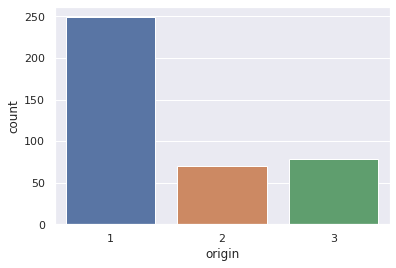

In [18]:
sns.countplot(x='origin',data=data);

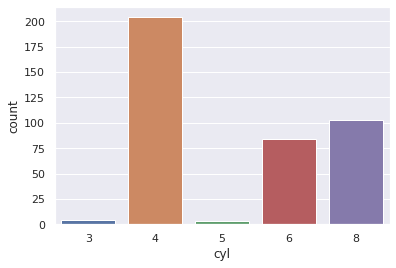

In [19]:
sns.countplot(x='cyl',data=data);

/home/mumbaikar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wt', ylabel='Density'>

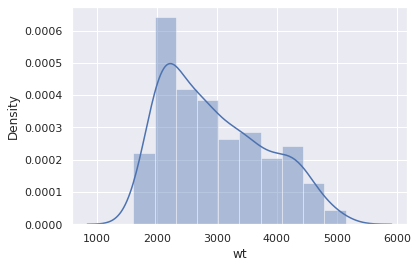

In [20]:
sns.distplot(data['wt'])

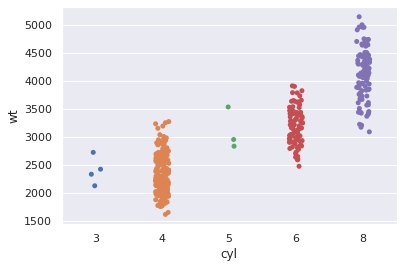

In [21]:
sns.stripplot(x=data['cyl'],y=data['wt']);

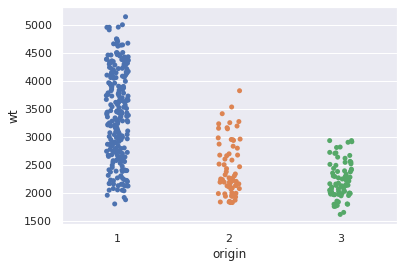

In [22]:
sns.stripplot(x=data['origin'],y=data['wt']);

Car of origin 1 have weight in range 1500 to 5000, Cars of origin 3 have lower weight and cars of origin 2 have lower to medium weight

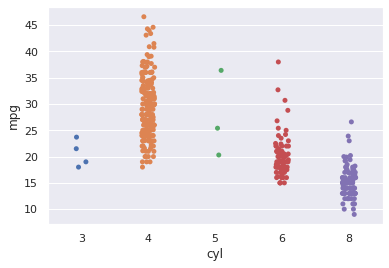

In [23]:
sns.stripplot(x=data['cyl'],y=data['mpg']);

Cars with 4 cyl have higher mpg

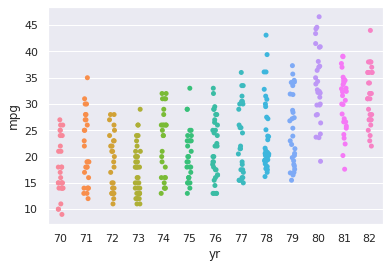

In [24]:
sns.stripplot(x=data['yr'],y=data['mpg']);

Over time miles per galon is increasing

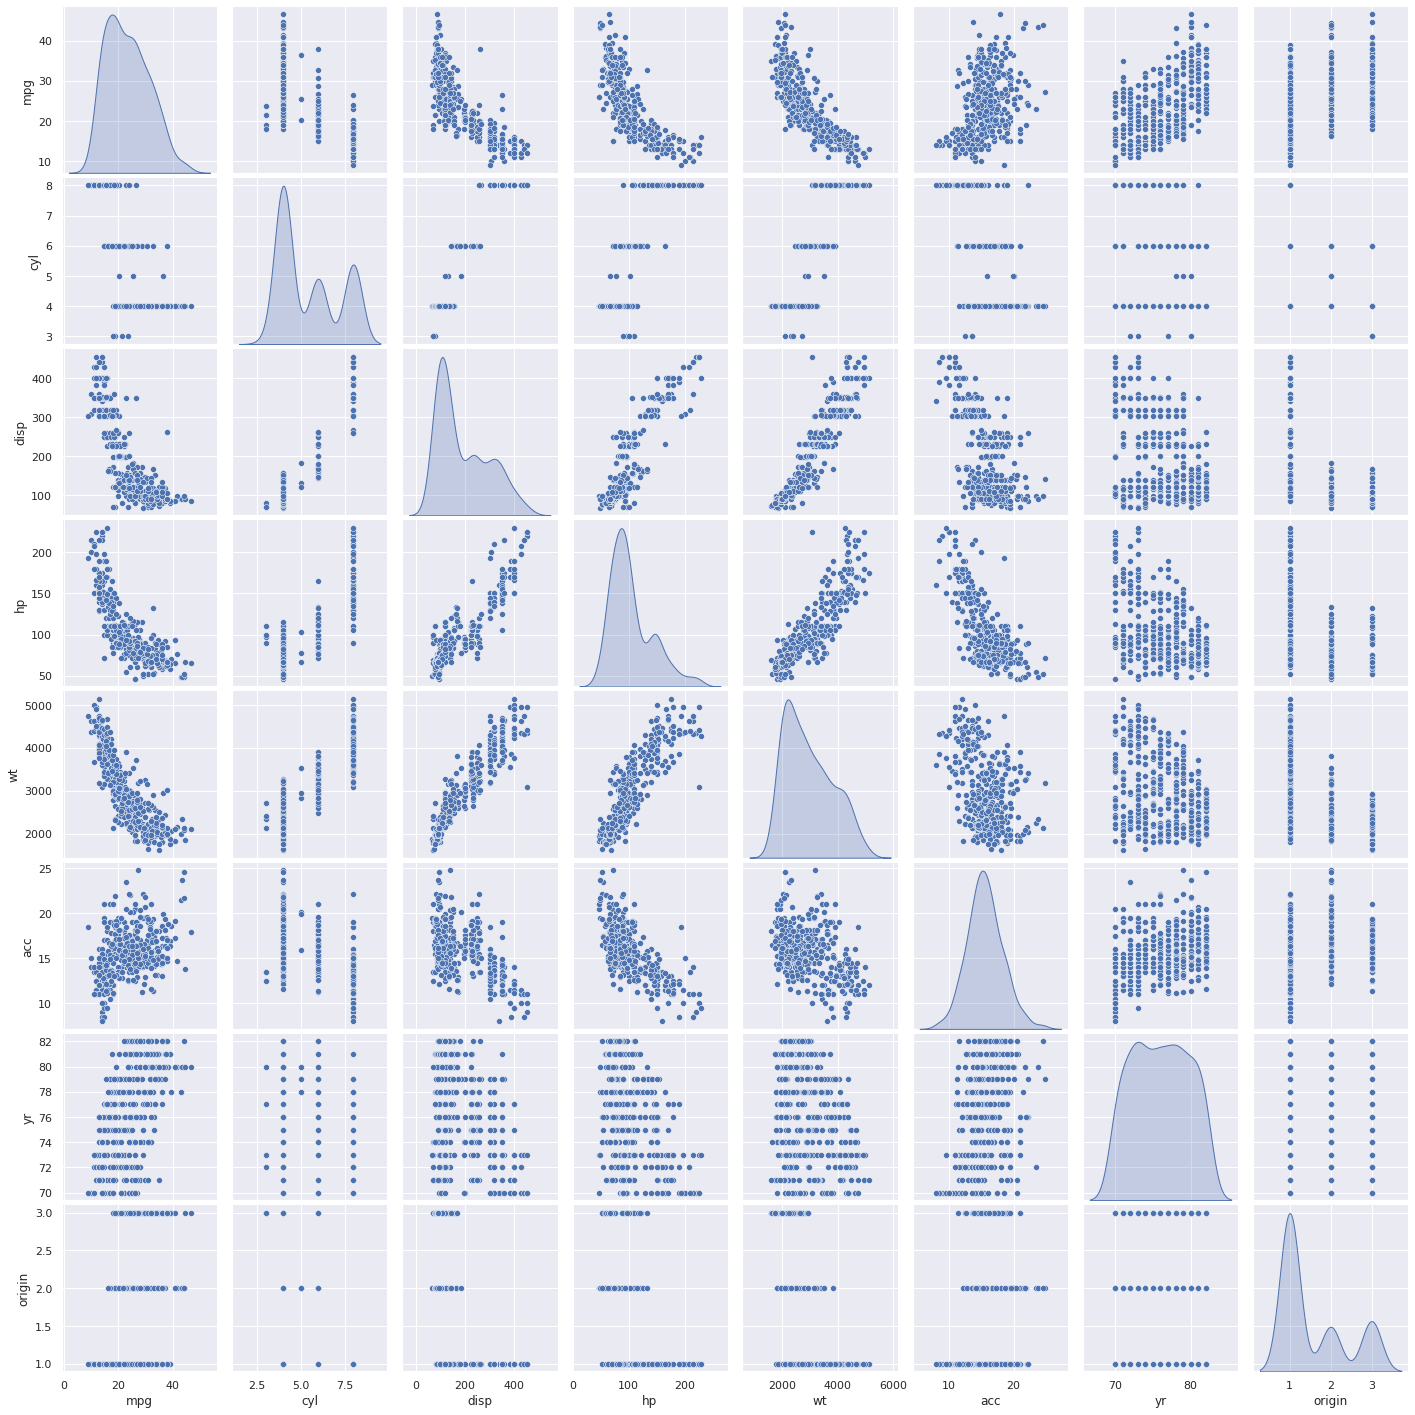

In [25]:
sns.pairplot(data, diag_kind="kde");

It can be seen that Miles per galon decreases with weight
Weight of cars is decreasing over time
Miles per galon decreases with increase in horse power

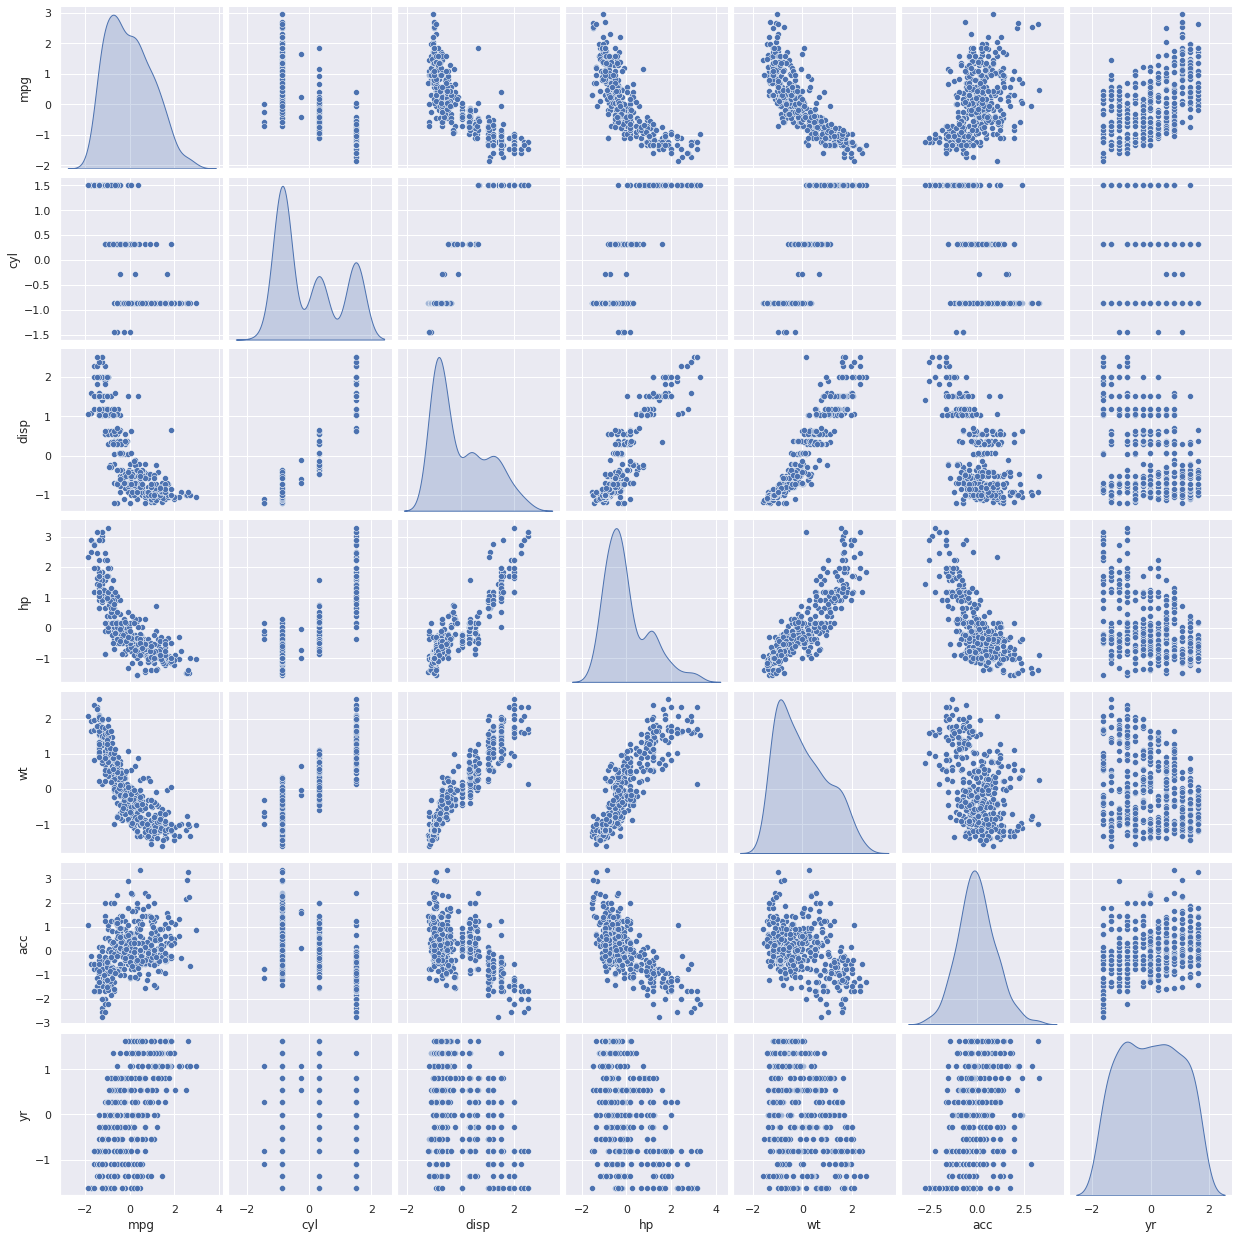

In [26]:
from scipy.stats import zscore
techSuppAttr=data.iloc[:,0:7]
techSuppScaled=techSuppAttr.apply(zscore)
sns.pairplot(techSuppScaled,diag_kind='kde')

# 4. Machine learning

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

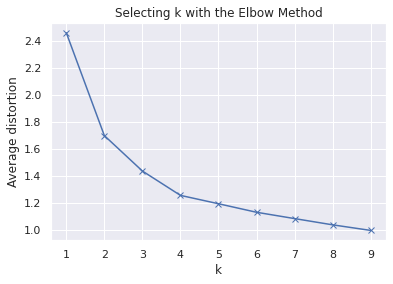

In [27]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(techSuppScaled)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1)) / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [28]:
#  Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
data["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1


In [29]:
techSuppClust = data.groupby(['GROUP'])
techSuppClust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,32.727193,4.052632,112.026316,76.035088,2320.385965,16.600877,80.078947,1.991228
1,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
2,19.636264,6.175824,225.219780,102.862637,3256.098901,16.376923,76.131868,1.164835
3,25.096970,3.989899,109.227273,83.025253,2328.787879,16.475758,73.626263,2.010101


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

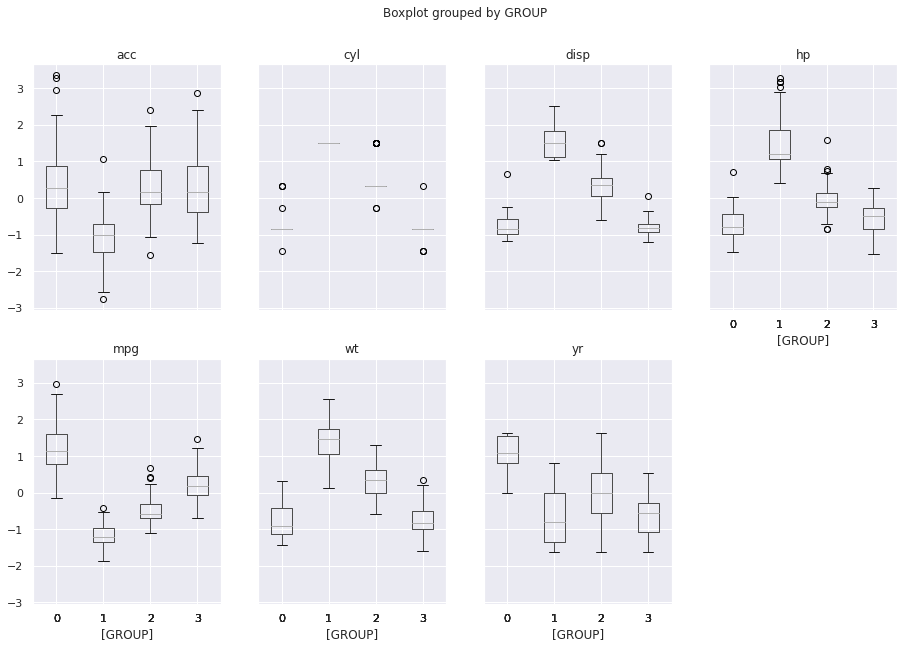

In [30]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

/home/mumbaikar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/mumbaikar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


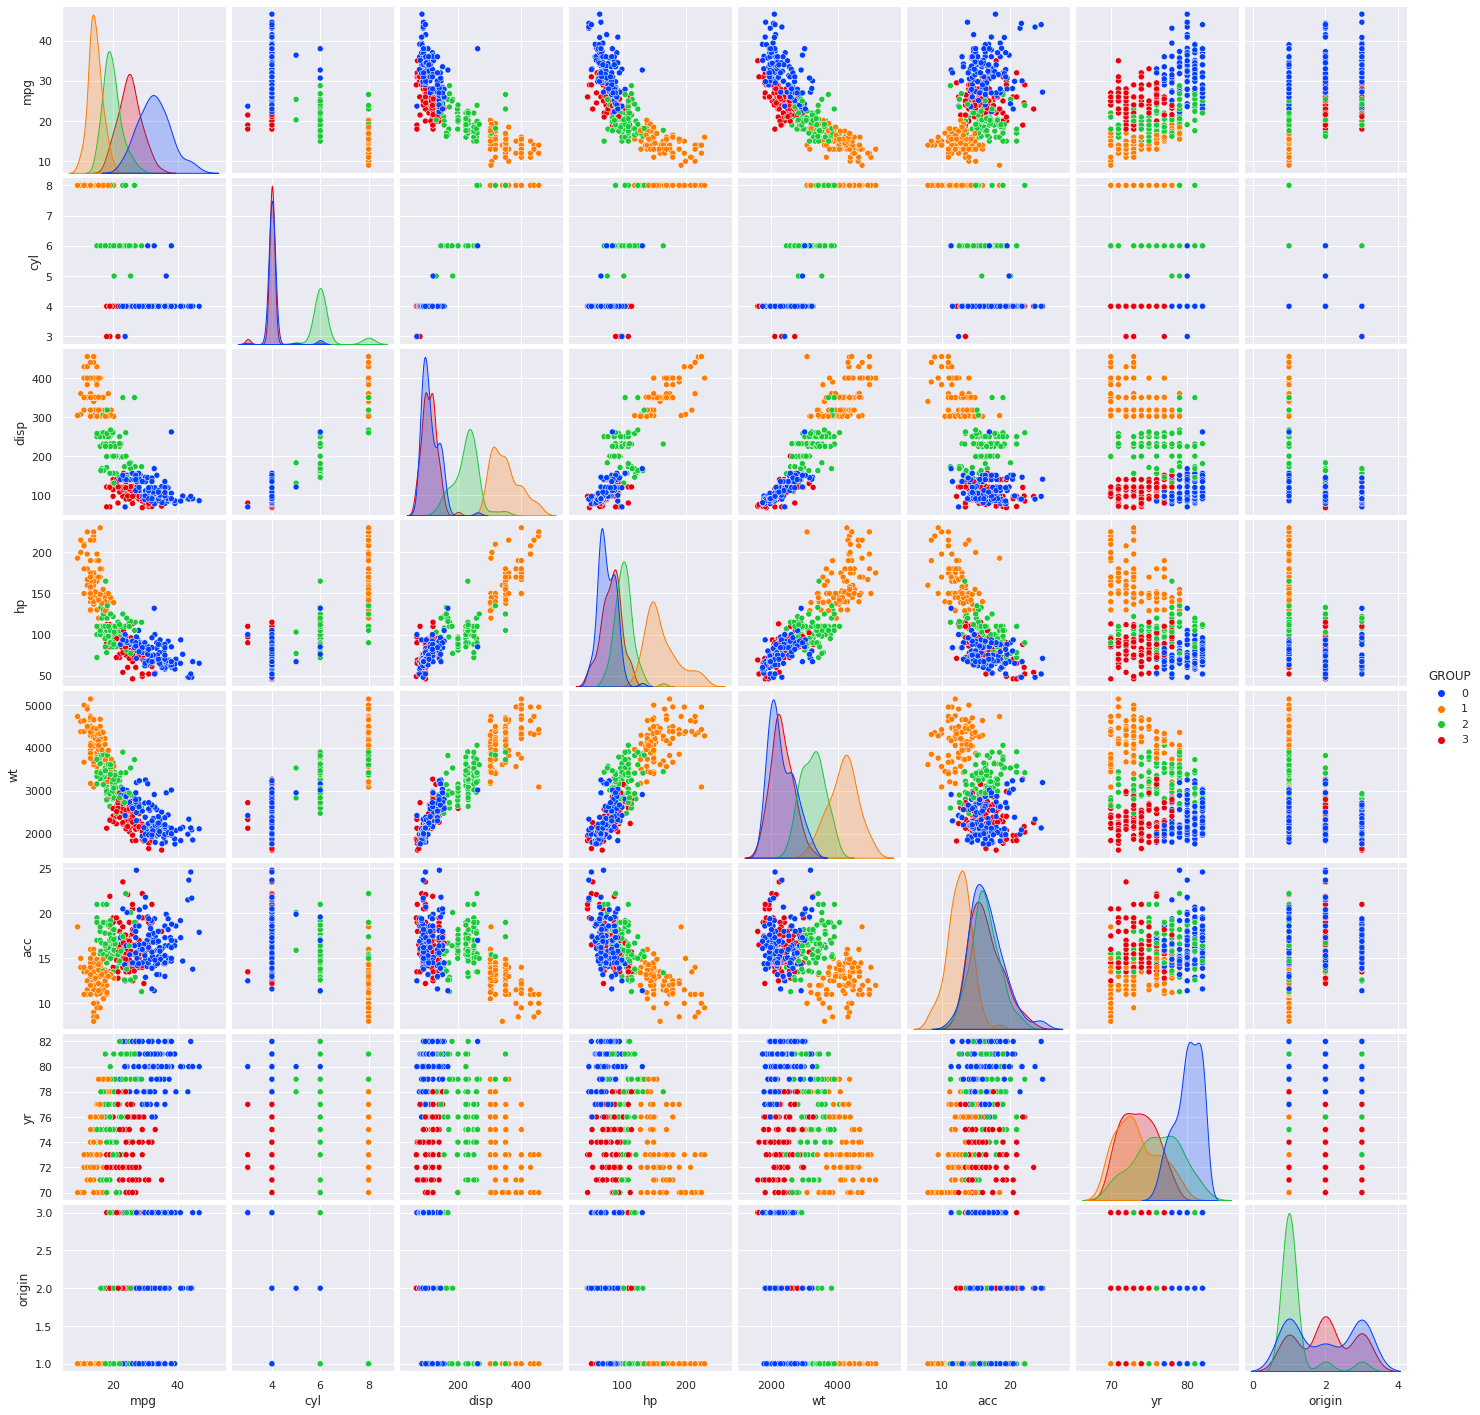

In [31]:
sns.pairplot(data,hue='GROUP',palette = "bright");

In [32]:
data1=data.copy()
data1=data1.drop(['GROUP'], axis=1)
techSuppScaled1=techSuppScaled.copy()
techSuppScaled1=techSuppScaled1.drop(['GROUP'], axis=1)

In [33]:
data1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [34]:
techSuppScaled1.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [35]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
model.fit(techSuppScaled1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [36]:
data1['labels'] = model.labels_
data1.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,labels
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,3
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,3
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,3
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,3
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,3
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,3
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,3
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,3
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,3


/home/mumbaikar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/mumbaikar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/mumbaikar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


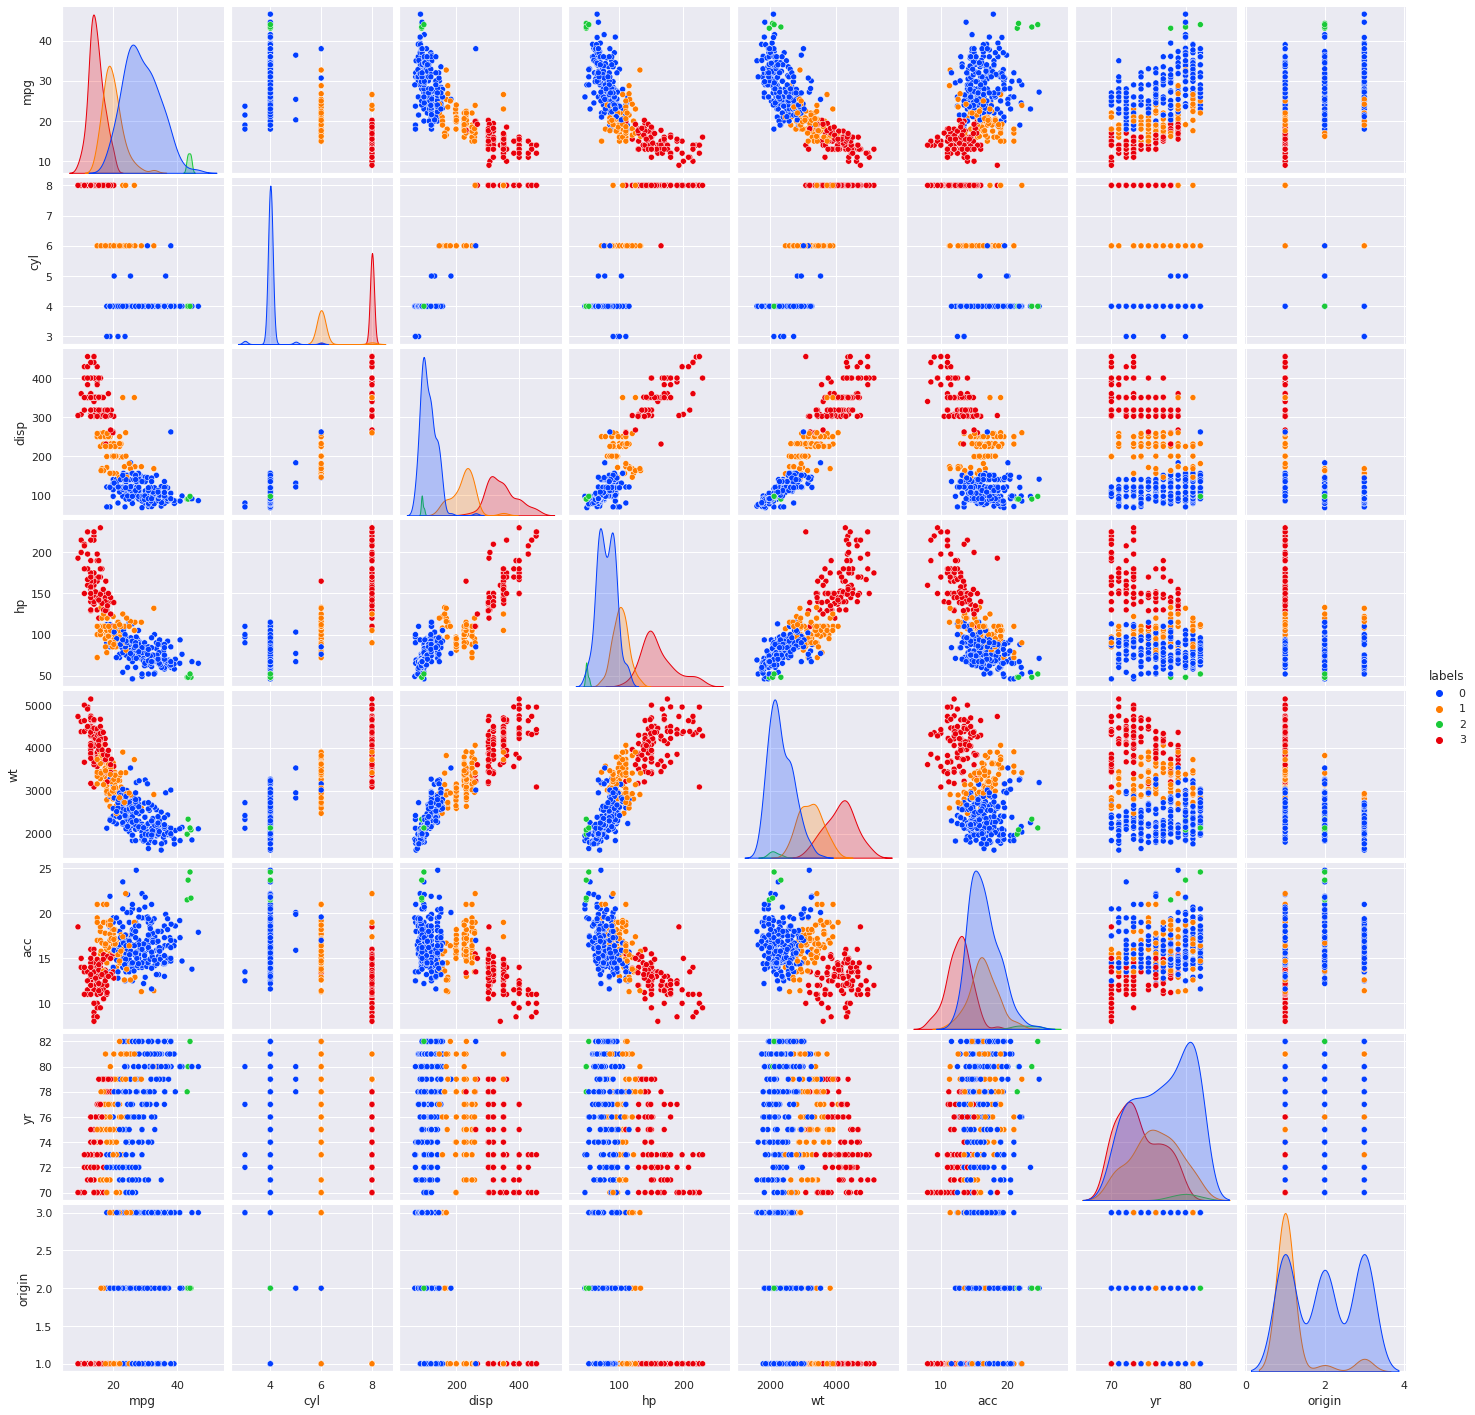

In [37]:
sns.pairplot(data1,hue='labels',palette = "bright");

In [38]:
custDataClust = data1.groupby(['labels'])

In [39]:
custDataClust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
labels,,,,,,,,
0,28.864593,4.014354,110.830144,79.686603,2332.066986,16.462679,77.057416,2.000000
1,19.798824,6.094118,222.423529,101.441176,3225.129412,16.396471,75.917647,1.176471
2,43.700000,4.000000,91.750000,49.000000,2133.750000,22.875000,80.000000,2.000000
3,14.684000,7.980000,345.470000,160.400000,4121.560000,12.702000,73.740000,1.000000


In [40]:
custDataClust.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,labels
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,3
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,3
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,3
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,3
14,24.0,4,113.0,95.0,2372,15.0,70,3,toyota corona mark ii,0
15,22.0,6,198.0,95.0,2833,15.5,70,1,plymouth duster,1
16,18.0,6,199.0,97.0,2774,15.5,70,1,amc hornet,1
17,21.0,6,200.0,85.0,2587,16.0,70,1,ford maverick,1
18,27.0,4,97.0,88.0,2130,14.5,70,3,datsun pl510,0


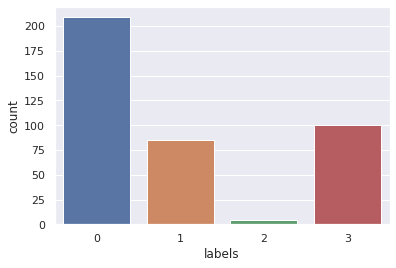

In [41]:
sns.countplot(x='labels',data=data1);

In [42]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [43]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(techSuppScaled1, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(techSuppScaled1))

c

0.788297546237694

# 5. Questions based on outcomes of using ML based methods

The optimal number of cluster could be 4 or 3 this is clear from elbow method and Kernel Density graph of Cylinder

In [44]:
group0=data.loc[data['GROUP']==0]
group1=data.loc[data['GROUP']==1]
group2=data.loc[data['GROUP']==2]
group3=data.loc[data['GROUP']==3]

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from scipy.stats import pearsonr

In [46]:
group2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,GROUP
15,22.0,6,198.0,95.0,2833,15.5,70,1,plymouth duster,2
16,18.0,6,199.0,97.0,2774,15.5,70,1,amc hornet,2
24,21.0,6,199.0,90.0,2648,15.0,70,1,amc gremlin,2
33,19.0,6,232.0,100.0,2634,13.0,71,1,amc gremlin,2
34,16.0,6,225.0,105.0,3439,15.5,71,1,plymouth satellite custom,2


In [47]:
X = group0.drop(['mpg','car_name','GROUP'], axis=1)
# the dependent variable
y = group0[['mpg']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [49]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [50]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 2.769147458311231
The coefficient for disp is 0.028266799014846508
The coefficient for hp is -0.10643120713238038
The coefficient for wt is -0.00848999000791183
The coefficient for acc is 0.3819206444784166
The coefficient for yr is 0.8716777464555673
The coefficient for origin is 0.7196294889584397


In [51]:
X = group1.drop(['mpg','car_name','GROUP'], axis=1)
# the dependent variable
y = group1[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
regression_model.fit(X_train, y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.0
The coefficient for disp is 0.0004056002408130033
The coefficient for hp is -0.03411653918723395
The coefficient for wt is -0.00129230538150342
The coefficient for acc is -0.47408242867062006
The coefficient for yr is 0.31122084457326066
The coefficient for origin is 0.0


In [52]:
X = group2.drop(['mpg','car_name','GROUP'], axis=1)
# the dependent variable
y = group2[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
regression_model.fit(X_train, y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.8660628364575649
The coefficient for disp is -0.006261552212582096
The coefficient for hp is -0.039537548377715115
The coefficient for wt is -0.0036851543775111417
The coefficient for acc is -0.21208452972898012
The coefficient for yr is 0.5403158664050208
The coefficient for origin is -0.2443846431422269


In [53]:
X = group3.drop(['mpg','car_name','GROUP'], axis=1)
# the dependent variable
y = group3[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
regression_model.fit(X_train, y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 2.2968506473874144
The coefficient for disp is -0.04340580518478469
The coefficient for hp is -0.0564196080140115
The coefficient for wt is -0.004734077252084537
The coefficient for acc is -0.3940934747401982
The coefficient for yr is 0.27033003228024904
The coefficient for origin is 0.02530870602829102


Using differnt models for different clusters will give better accuracy in predicting the target variable than using a single model without clustering.

# Improvisation

More attributes of car can be collected.
Model month can also be recorded

Data about average speed of car will also affect miles per gallon